In [2]:
# Data pre-processing
#– Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm
# Understanding the attributes - Find relationship between different attributes (Independent variables) and 
# choose carefully which all attributes have to be a part of the analysis and why 

1. Conducting EDA on the data to find out the following
 - number of rows and columns
 - datatypes of the attributes
 - presence of missing data (na values)
 - presence of -ve values
 - presence of outliers
 - distribution of target variables

2. Data cleaning
 - Missing values are replaced with medians as they are less affected by outliers when compared to mean
 - The nominal values in class attribute is replaced with numbers
 - Datatype of class column is changed from 'object' to 'category'
 - class column is removed from the dataframe
 - Outliers are identified and are replaced using medians

3. Univariate and bivariate analysis
 - checking skewness and correlation between attributes and target
 - Pairplot is used to determine corelated attributes
 - heat map is used along with corr func to determine strongly corelated attribute and to drop attributes that would    create multicollinearity. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

from sklearn.svm import SVC

from sklearn.decomposition import PCA
# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

random_state=42

%matplotlib inline

In [4]:
# data is read from csv
raw_data=pd.read_csv("vehicle-1.csv")
df=raw_data.copy()

In [5]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

1. Dataframe has 846 observations
2. There are 18 attributes(14-float and 4 integer) and one target(object) variable.
3. There are some null values in the dataframe 


In [7]:
df.describe(include='all').T

count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   
scaled_radius_of_gyration     844    NaN  NaN  NaN   174.71  32.5848  109   
scaled_radius_of_gyration.1   842    NaN  NaN  NaN  72.4477  7.48619   59   
skewness_about                840    NaN  NaN  NaN  6.36429  4.92065    0   
skewness_about.1              845    NaN  NaN  NaN  12.6024  8.93608    0   
skewness_about.2              845    NaN  NaN  NaN   188.92  6.15581  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%  75%   max  
compactness                      87     93  100   119  
circularity                      40     44   49    59  
distance_circularity             70     80   98   112  
radius_ratio                    141    167  195   333  
pr.axis_aspect_ratio             57     61   65   138  
max.length_aspect_ratio           7      8   10    55  
scatter_ratio                   147    157  198   265  
elongatedness                    33     43   46    61  
pr.axis_rectangularity           19     20   23    29  
max.length_rectangularity       137    146  159   188  
scaled_variance                 167    179  217   320  
scaled_variance.1               318  363.5  587  1018  
scaled_radius_of_gyration       149  173.5  198   268  
scaled_radius_of_gyration.1      67   71.5   75   135  
skewness_about                    2      6    9    22  
skewness_about.1                  5     11   19    41  
skewness_about.2                184    188  193   206  
hollows_ratio                190.25    197  201   211  
class                           NaN    NaN  NaN   NaN

1. Some of the attributes are having skewed distribution
2. Outliers are present in the data

In [8]:
#to segregate quantitative and qualitative quantities 
cat_mask=df.dtypes=='object'
cat_cols=df.columns[cat_mask]
num_cols=df.columns[~cat_mask]

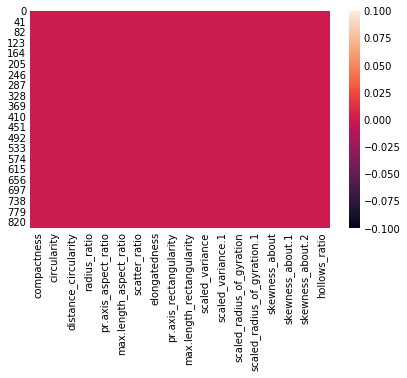

In [9]:
# negative numbers in dataframe
sns.heatmap(df[num_cols]<0)


There are no negative values.

In [10]:
# checking for missing values
df.isna().sum().sum()

41

1. Dropping all NA values would affect the dataset because there are only 846 observations 
2. So ~4%(33/846) of data will be lost.
3. Few rows have more than one na vlaues.Dropping rows with 2 NA values will be a good approach.
4. Only 0.35% of data is removed. 
5. For the rest of the na values, median value can be used to fill the columns



In [11]:
# removing rows with more than one NAN
df_imputed=df.dropna(axis=0,thresh=17) 
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  845 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         841 non-null    float64
 3   radius_ratio                 839 non-null    float64
 4   pr.axis_aspect_ratio         843 non-null    float64
 5   max.length_aspect_ratio      845 non-null    int64  
 6   scatter_ratio                844 non-null    float64
 7   elongatedness                844 non-null    float64
 8   pr.axis_rectangularity       842 non-null    float64
 9   max.length_rectangularity    845 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            843 non-null    float64
 12  scaled_radius_of_gyration    843 non-null    float64
 13  scaled_radius_of_gyr

In [12]:
#checking number of nan values after removing rows with 2 nan 
df_imputed.isna().sum().sum()


38

In [13]:
#Filling NaN values with median values
for i in num_cols:
    df_imputed[i].fillna(value=df_imputed[i].median(),inplace=True)

df_imputed.isna().sum().sum()
    


0

In [14]:
df_imputed['class']=df_imputed['class'].astype('category')

In [15]:
print(df_imputed['class'].unique())# it has 3 values. 


[van, car, bus]
Categories (3, object): [van, car, bus]


In [16]:
#Replacing each unique value with a unique number
replace_struct={'van':1,'bus':2,'car':3}
df_imputed.replace(replace_struct,inplace=True)
print(df_imputed['class'].unique())

[1 3 2]


In [17]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  845 non-null    int64  
 1   circularity                  845 non-null    float64
 2   distance_circularity         845 non-null    float64
 3   radius_ratio                 845 non-null    float64
 4   pr.axis_aspect_ratio         845 non-null    float64
 5   max.length_aspect_ratio      845 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       845 non-null    float64
 9   max.length_rectangularity    845 non-null    int64  
 10  scaled_variance              845 non-null    float64
 11  scaled_variance.1            845 non-null    float64
 12  scaled_radius_of_gyration    845 non-null    float64
 13  scaled_radius_of_gyr

In [18]:
#checking the distribution of the unique values in the class column
df_imputed['class'].value_counts(normalize=True)*100

3    50.650888
2    25.798817
1    23.550296
Name: class, dtype: float64

1. The dataset is imbalanced.
2. It has more columns with label car than the other two.
3. No. of columns with labels Van and bus are almost equal number.

# Univariate Analysis

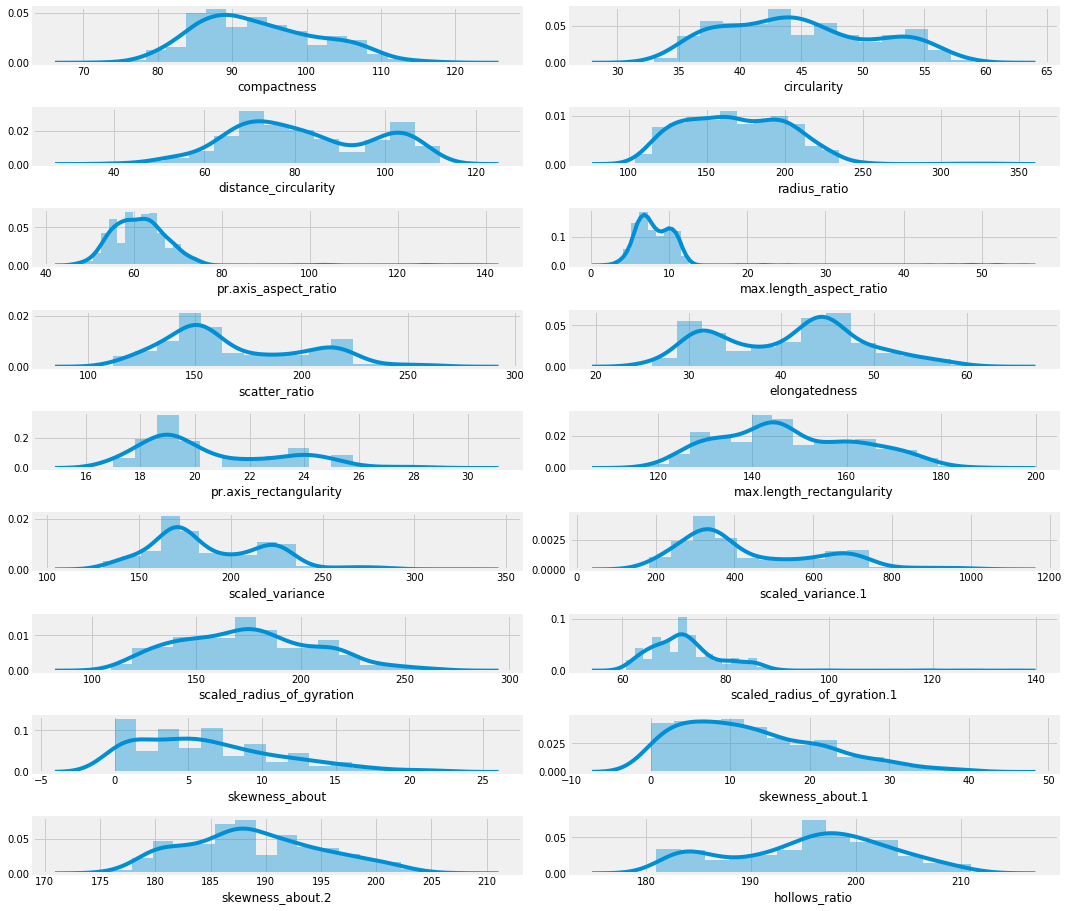

In [19]:
# Detecting skewness
plt.figure(figsize=(15,25))
j=1
for i in num_cols:
    plt.subplot(18,2,j)
    plt.tight_layout()
    sns.distplot(df_imputed[i])
    j=j+1


In [20]:
#checking skewness in data
#For a unimodal distribution, negative skew commonly indicates that the tail is on the left side of the distribution, 
#and positive skew indicates that the tail is on the right

df_imputed[num_cols].skew(axis = 0, skipna = True)


compactness                    0.383030
circularity                    0.264306
distance_circularity           0.110939
radius_ratio                   0.400404
pr.axis_aspect_ratio           3.834742
max.length_aspect_ratio        6.776640
scatter_ratio                  0.612062
elongatedness                  0.045367
pr.axis_rectangularity         0.778128
max.length_rectangularity      0.258869
scaled_variance                0.654266
scaled_variance.1              0.849567
scaled_radius_of_gyration      0.282785
scaled_radius_of_gyration.1    2.089644
skewness_about                 0.783957
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.224790
dtype: float64

1. Few of the attributes are highly skewed
2. Max. length_aspect_ratio and pr.axis_aspect_ratio are the most skewed         
3. Few of the attributes ar bimodal in nature

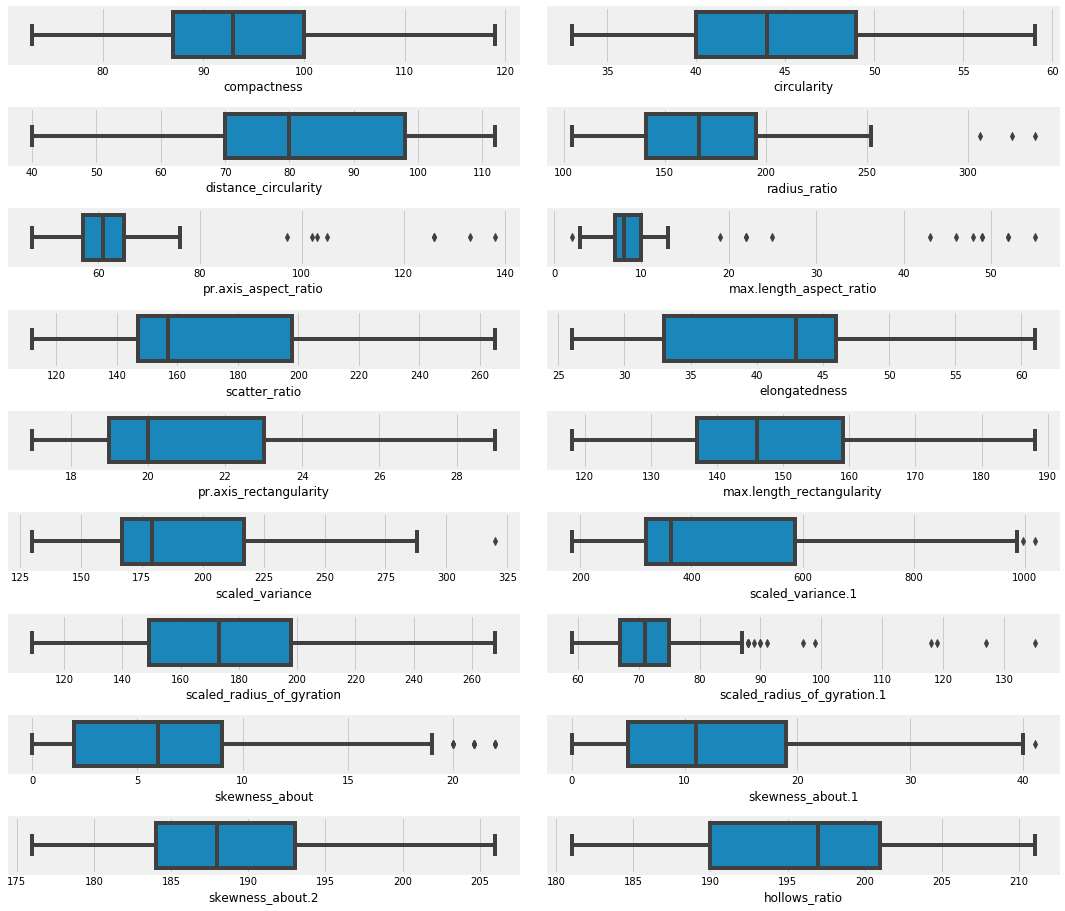

In [36]:
#Presence of outliers
# Detetcting outliers
plt.figure(figsize=(15,25))
j=1
for i in num_cols:
    plt.subplot(18,2,j)
    plt.tight_layout()
    sns.boxplot(df_imputed[i])
    j=j+1

    

In [21]:
# Removing outliers with upper and lower percentile values being 75 and 25, respectively
vehicle_df = df_imputed.copy(deep = True)
outliers_cols = ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1',
           'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']

for col in outliers_cols:
    Q3 = vehicle_df[col].quantile(0.75)
    Q1 = vehicle_df[col].quantile(0.25)
    IQR = Q3 - Q1
    upper_lim = Q3 + (1.5 * IQR)
    lower_lim = Q1 - (1.5 * IQR)
    vehicle_df.loc[(vehicle_df[col] < lower_lim) | (vehicle_df[col] > upper_lim), col] = np.nan

print('Column for which outliers where removed with upper and lower percentile values: \n', outliers_cols)

Column for which outliers where removed with upper and lower percentile values: 
 ['radius_ratio', 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1']


In [22]:
#vehicle_df.isnull().sum()

In [23]:
# Using fillna to fill missing values by median
print('Descriptive Stats before handling outliers: \n', '--'*30)
display(df_imputed[outliers_cols].describe().T)

#columns = list(vehicle_im.columns)
#impute = SimpleImputer(missing_values = np.nan, strategy = 'median', verbose = 1)
#vehicle_im = pd.DataFrame(impute.fit_transform(vehicle_im), columns = columns)
for i in outliers_cols:
    vehicle_df[i].fillna(value=vehicle_df[i].median(),inplace=True)

#df_imputed.isna().sum().sum()

print('Descriptive Stats after handling outliers: \n', '--'*30)
#display(vehicle_im[outliers_cols].describe().T)
display(vehicle_df[outliers_cols].describe().T)
#del outliers_cols, vehicle

Descriptive Stats before handling outliers: 
 ------------------------------------------------------------


count        mean         std    min    25%  \
radius_ratio                 845.0  168.835503   33.401658  104.0  141.0   
pr.axis_aspect_ratio         845.0   61.674556    7.886450   47.0   57.0   
max.length_aspect_ratio      845.0    8.565680    4.603677    2.0    7.0   
scaled_variance              845.0  188.608284   31.377259  130.0  167.0   
scaled_variance.1            845.0  438.991716  176.353301  184.0  318.0   
scaled_radius_of_gyration.1  845.0   72.440237    7.473510   59.0   67.0   
skewness_about               845.0    6.356213    4.903546    0.0    2.0   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.0   

                               50%    75%     max  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.0  586.0  1018.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0

Descriptive Stats after handling outliers: 
 ------------------------------------------------------------


count        mean         std    min    25%  \
radius_ratio                 845.0  168.291124   32.146038  104.0  141.0   
pr.axis_aspect_ratio         845.0   61.151479    5.615927   47.0   57.0   
max.length_aspect_ratio      845.0    8.115976    2.064320    3.0    7.0   
scaled_variance              845.0  188.441420   31.050913  130.0  167.0   
scaled_variance.1            845.0  437.465089  174.196361  184.0  318.0   
scaled_radius_of_gyration.1  845.0   71.931361    6.163647   59.0   67.0   
skewness_about               845.0    6.127811    4.574579    0.0    2.0   
skewness_about.1             845.0   12.566864    8.882559    0.0    5.0   

                               50%    75%    max  
radius_ratio                 167.0  194.0  252.0  
pr.axis_aspect_ratio          61.0   65.0   76.0  
max.length_aspect_ratio        8.0   10.0   13.0  
scaled_variance              179.0  217.0  288.0  
scaled_variance.1            363.0  586.0  987.0  
scaled_radius_of_gyration.1   71.0   75.0   87.0  
skewness_about                 5.0    9.0   19.0  
skewness_about.1              11.0   19.0   40.0

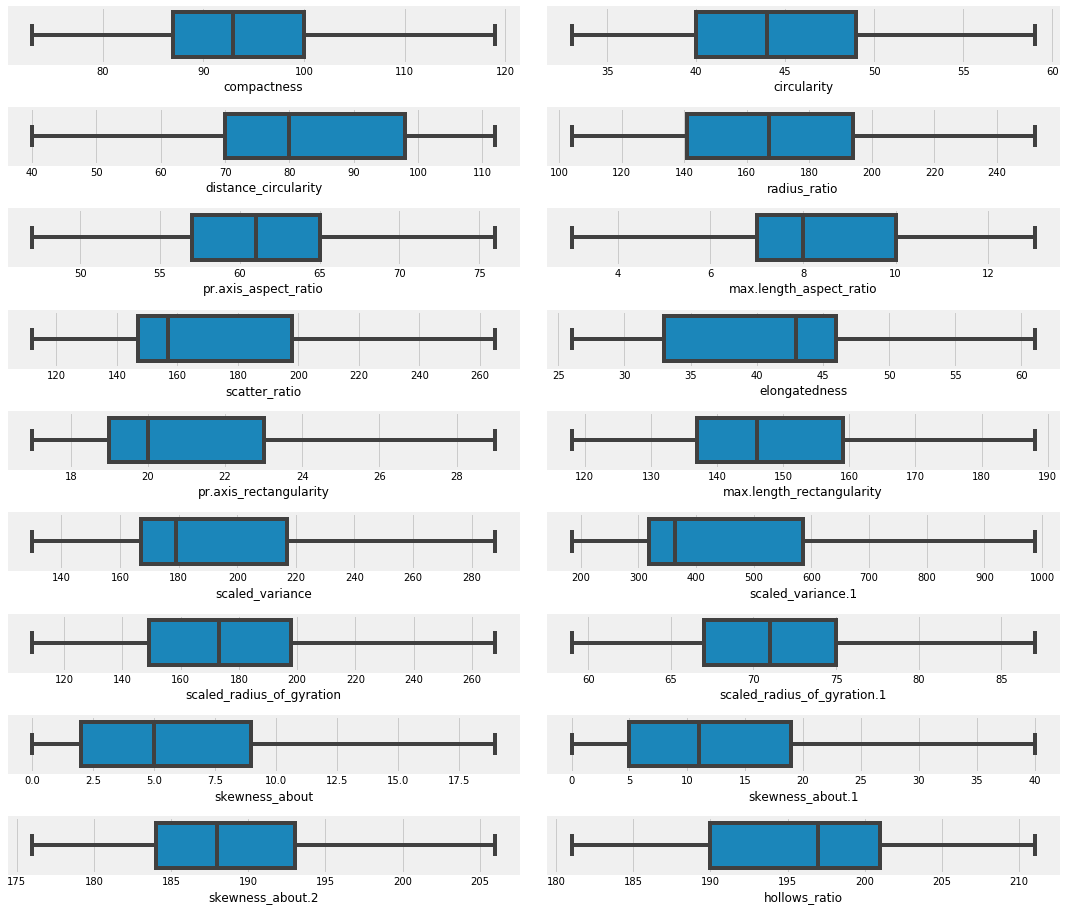

In [40]:
#Presence of outliers after replacing outliers with median
# Detetcting outliers
plt.figure(figsize=(15,25))
j=1
for i in num_cols:
    plt.subplot(18,2,j)
    plt.tight_layout()
    sns.boxplot(vehicle_df[i])
    j=j+1


Outliers are identified and are replaced using median in the dataset

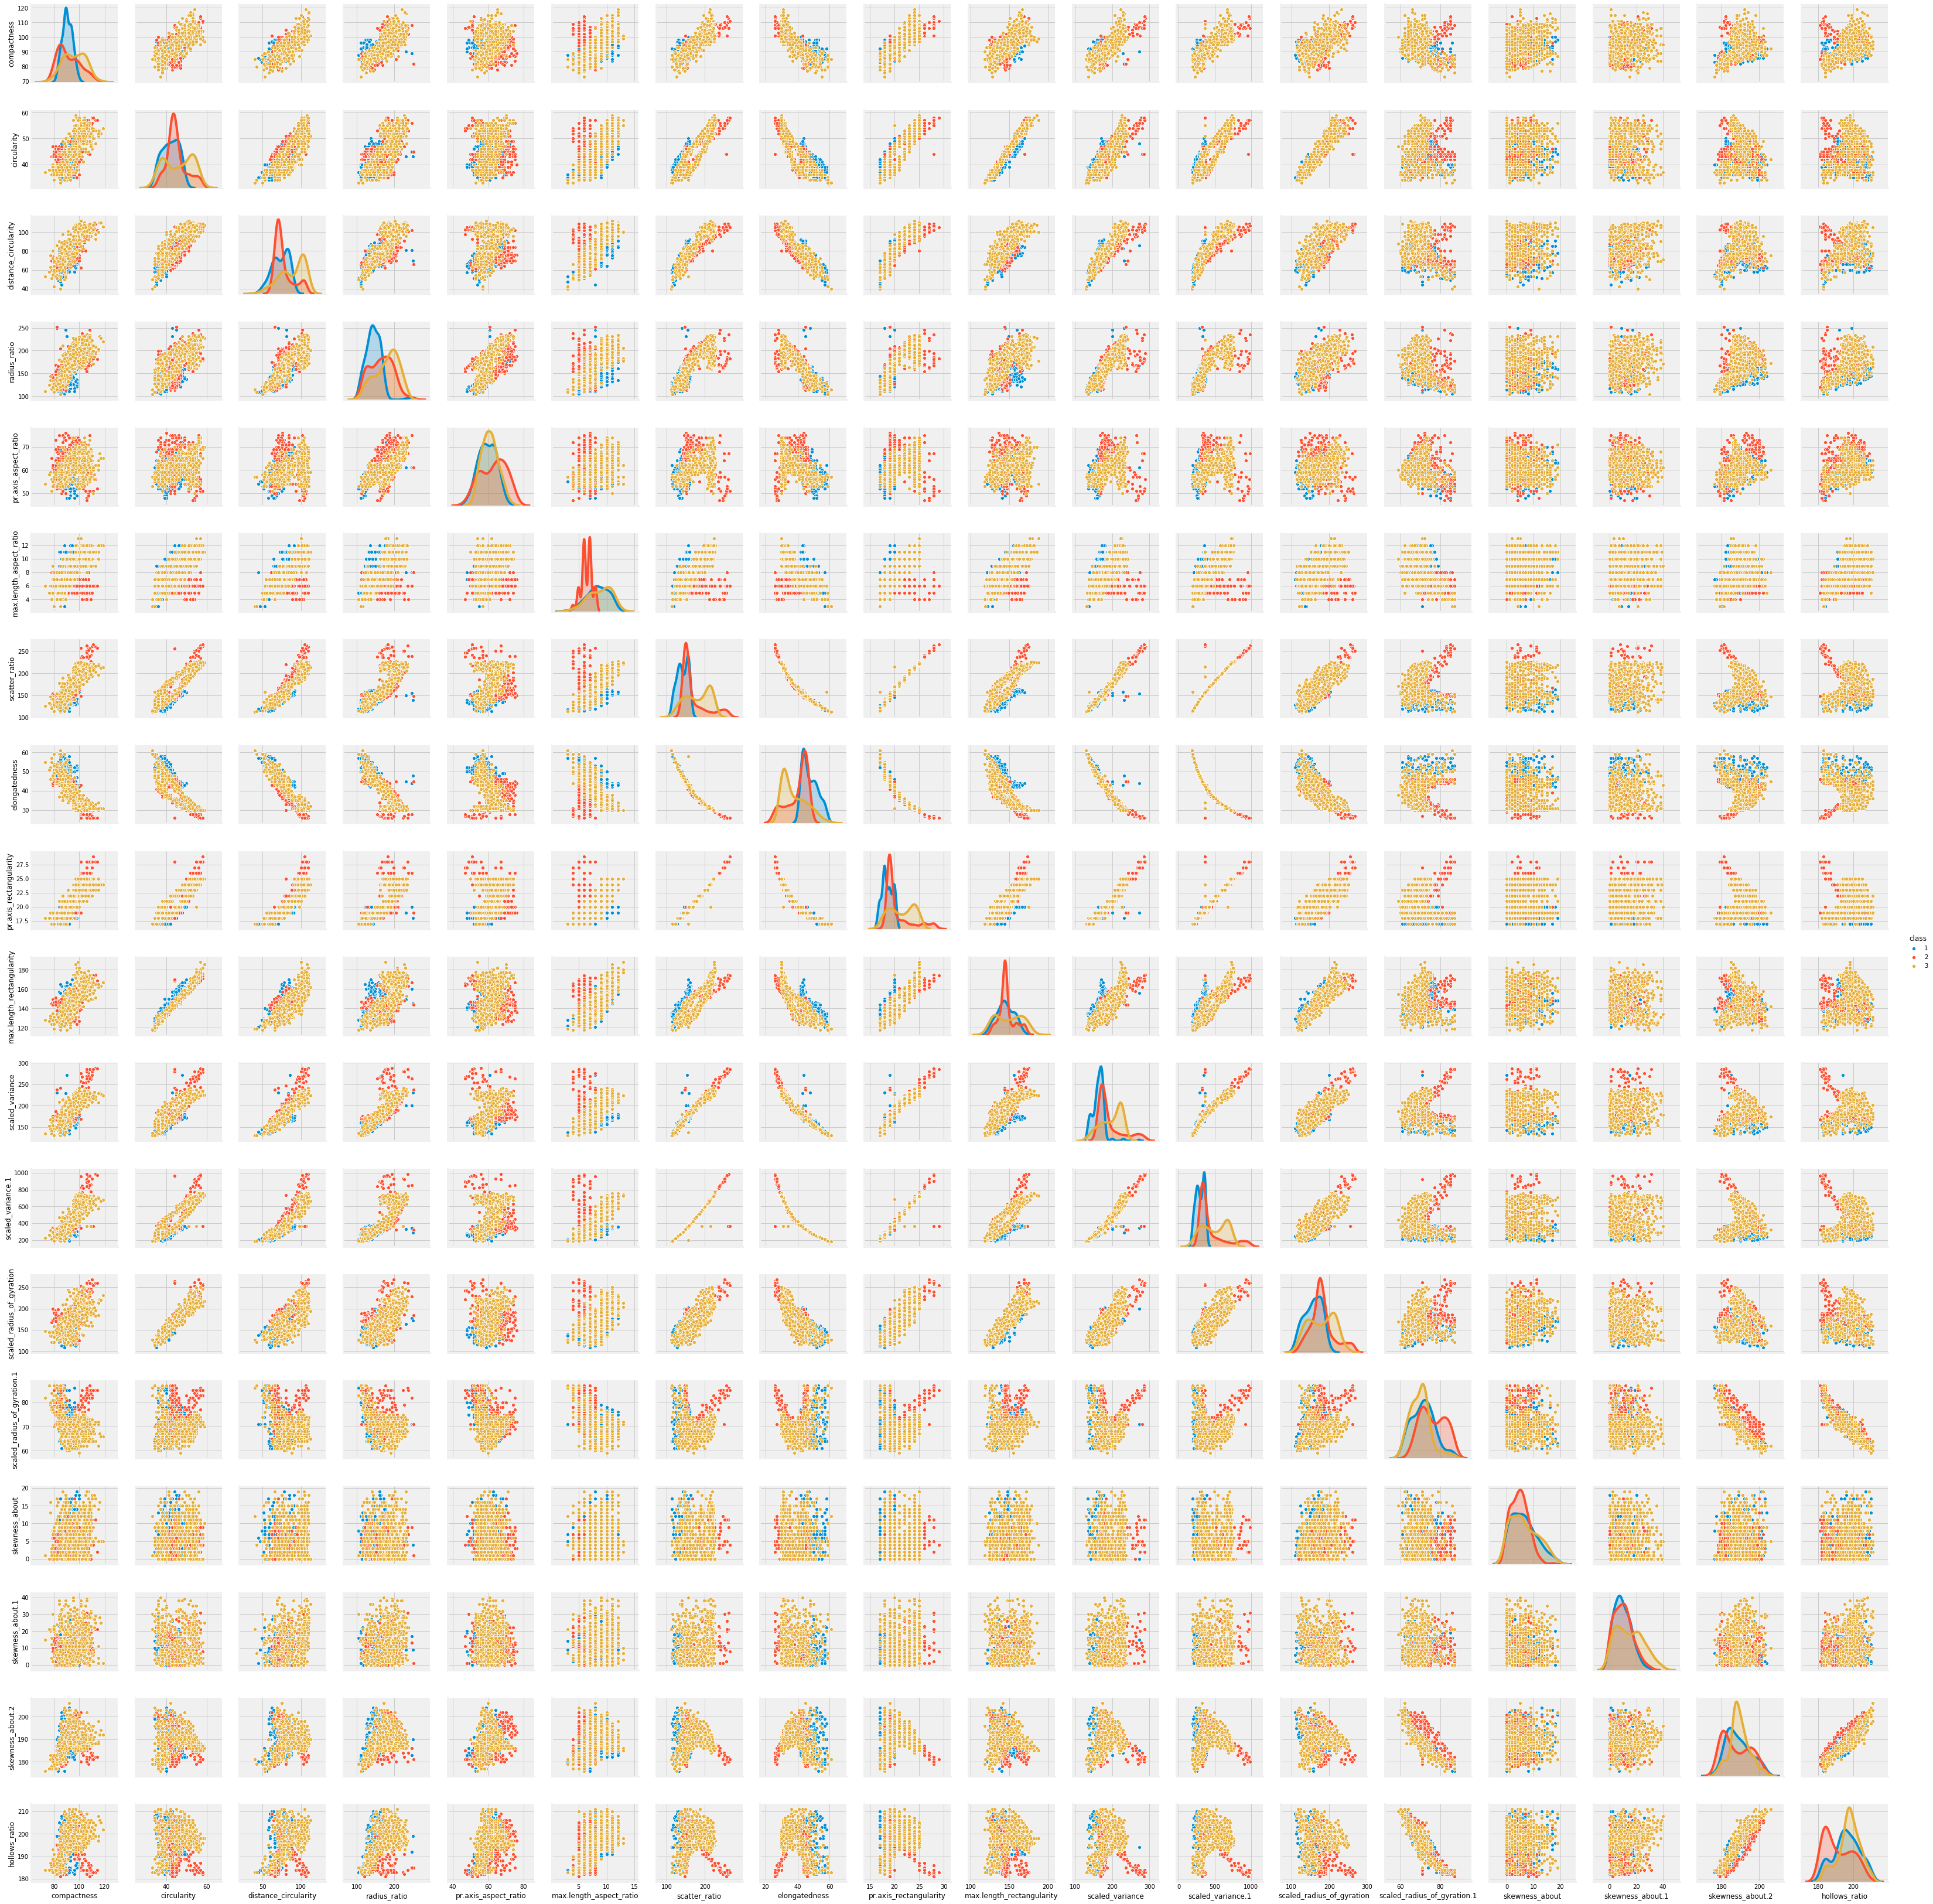

In [41]:
sns.pairplot(vehicle_df,hue='class')

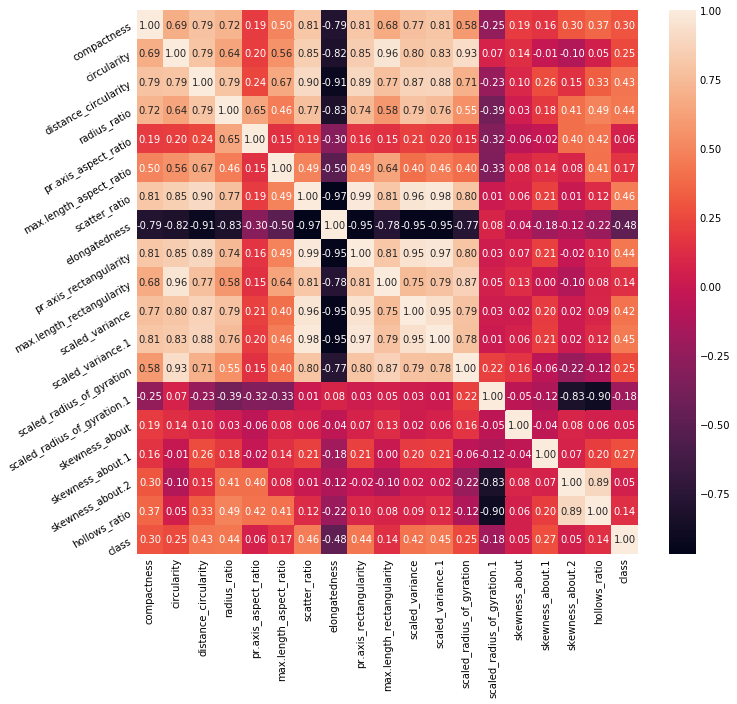

In [25]:
# To check the correlation coefficient between variables
corr=vehicle_df.corr()
plt.figure(figsize=(10,10))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)


In [26]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
display(sort[(sort > 0.5) & (sort < 1)])


scatter_ratio              pr.axis_rectangularity       0.989735
pr.axis_rectangularity     scatter_ratio                0.989735
scatter_ratio              scaled_variance.1            0.980359
scaled_variance.1          scatter_ratio                0.980359
pr.axis_rectangularity     scaled_variance.1            0.973501
                                                          ...   
max.length_aspect_ratio    circularity                  0.560897
scaled_radius_of_gyration  radius_ratio                 0.550164
radius_ratio               scaled_radius_of_gyration    0.550164
elongatedness              max.length_aspect_ratio      0.503501
max.length_aspect_ratio    elongatedness                0.503501
Length: 126, dtype: float64

In [27]:
# Absolute correlation of independent variables with 'class' i.e. the target variable
absCorrwithDep = []
allVars = vehicle_df.drop('class', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(vehicle_df['class'].corr(vehicle_df[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

Variable Correlation
7                 elongatedness    0.482337
6                 scatter_ratio     0.46281
11            scaled_variance.1    0.450809
8        pr.axis_rectangularity    0.443761
3                  radius_ratio    0.443493
2          distance_circularity     0.42777
10              scaled_variance     0.42087
0                   compactness    0.296611
15             skewness_about.1    0.269859
1                   circularity    0.251544
12    scaled_radius_of_gyration    0.246802
13  scaled_radius_of_gyration.1    0.180749
5       max.length_aspect_ratio    0.166574
17                hollows_ratio    0.142459
9     max.length_rectangularity     0.13892
4          pr.axis_aspect_ratio   0.0624856
16             skewness_about.2   0.0549157
14               skewness_about   0.0540493

1. scatter_ratio and pr.axis_rectangularity; scaled_variance.1 and scatter_ratio; pr.axis_rectangularity and scaled_variance.1; pr.axis_rectangularity and scaled_variance.1; elongatedness and scatter_ratio; circularity and max.length_rectangularity; scaled_variance and scatter_ratio; elongatedness and pr.axis_rectangularity; elongatedness and scaled_variance.1; elongatedness and scaled_variance; pr.axis_rectangularity, scaled_variance and scaled_variance.1; distance_circularity and elongatedness; circularity and scaled_radius_of_gyration; distance_circularity and elongatedness; scatter_ratio and distance_circularity are highly correlated with each other. And has a correlation coeff greater than 0.9.

2. elongatedness, scatter_ratio, scaled_variance.1, pr.axis_rectangularity and radius_ratio are some columns which also have relatively strong correlation with the class variable than the rest of the attributes.

3. All these columns are to be retained because even though multicollinearity exists between attributes, some of these are strongly corelated to the target variable. 

4. Removing max.length_rectangularity, scaled_variance, scaled_radius_of_gyration, distance_circularity, hollows_ratio and skewness_about.2 from the dataset

In [28]:
vehicle_df.drop(['max.length_rectangularity', 'scaled_variance', 'scaled_radius_of_gyration', 
                 'distance_circularity', 'hollows_ratio', 'skewness_about.2'], axis = 1, inplace = True)

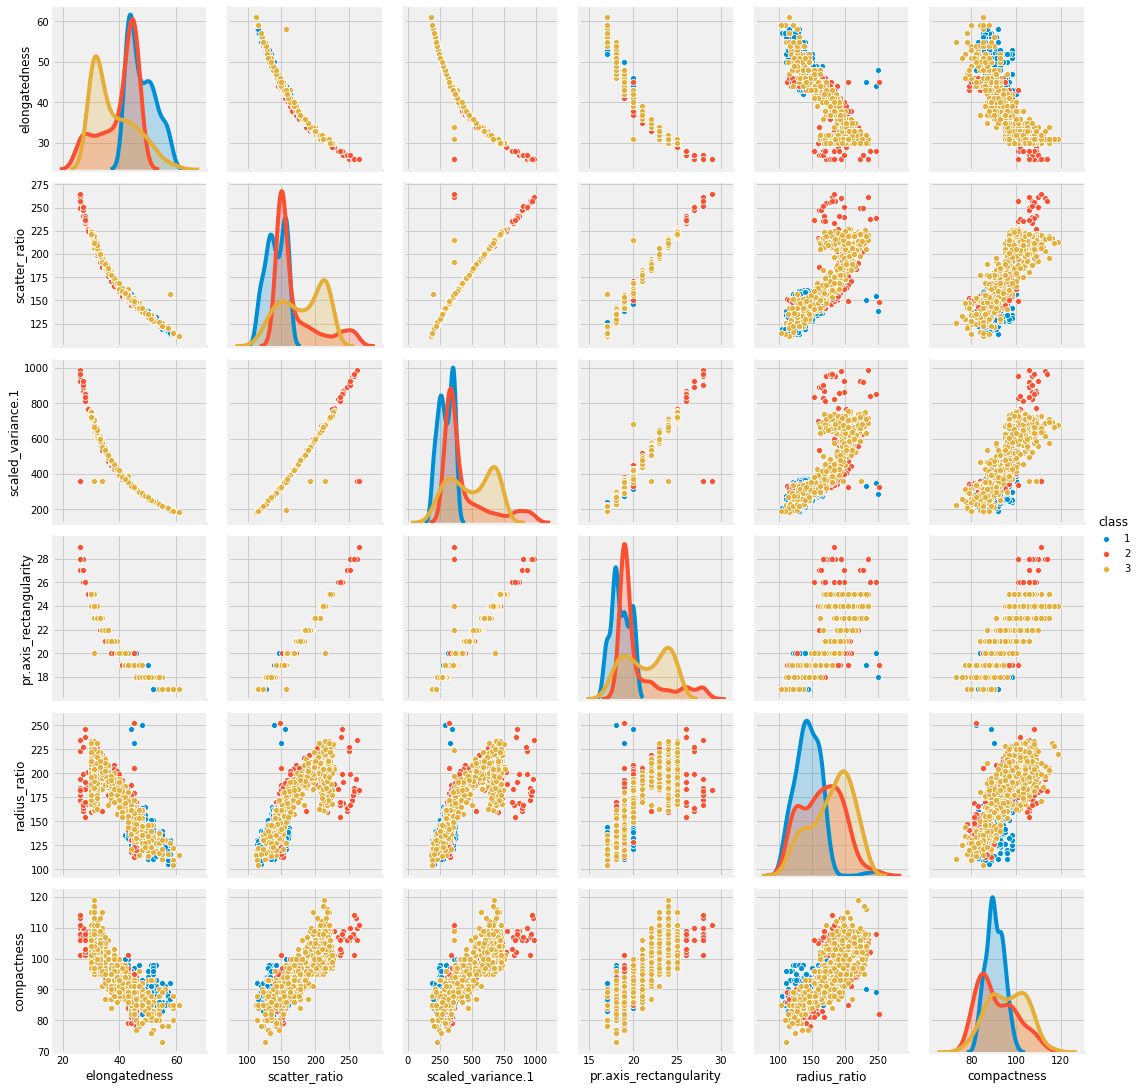

In [46]:
#highly correlated attributes
sns.pairplot(vehicle_df[['elongatedness', 'scatter_ratio', 'scaled_variance.1', 
             'pr.axis_rectangularity', 'radius_ratio', 'compactness', 'class']], hue = 'class')

In [29]:
#Splitting X and y into target and explanatory variables
df_X=vehicle_df.drop('class',axis=1)
df_y=vehicle_df['class']

In [30]:
#Split the data into train and test 
#(Suggestion: specify “random state” if you are using train_test_split from Sklearn)
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.30, 
                                                    random_state = random_state, shuffle = False)

In [31]:
#Train a Support vector machine using the train set and get the accuracy on the test set

print('****'*10)
print("SVC with imbalanced data:")
print('****'*10)

svc=SVC(gamma="auto",kernel='linear',C=1,random_state=random_state)
svc.fit(X_train,y_train)
predict_svc=svc.predict(X_test)

# print classification report 
print(classification_report(y_test, predict_svc))
print("Score-Training Dataset - ",svc.score(X_train,y_train))
print("Score-Testing Dataset - ",svc.score(X_test,y_test))
print('\n')
#print Confusion matrix and Accuracy Score
results = confusion_matrix(y_test,predict_svc) 
print ('Confusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test,predict_svc ))
print('\n')

****************************************
SVC with imbalanced data:
****************************************
             precision    recall  f1-score   support

          1       0.85      0.97      0.90        59
          2       0.92      0.95      0.94        62
          3       0.97      0.89      0.93       133

avg / total       0.93      0.93      0.93       254

Score-Training Dataset -  0.9137055837563451
Score-Testing Dataset -  0.9251968503937008


Confusion Matrix :
[[ 57   0   2]
 [  1  59   2]
 [  9   5 119]]


Accuracy Score : 0.9251968503937008




In [32]:
#Perform K-fold cross validation and get the cross validation score of the model
kf = KFold(n_splits=10, random_state=random_state)
svc_scores=cross_val_score(svc,df_X,df_y,cv=kf)
svc_cv=svc_scores.mean()
print("\nCross val score of svc - ", svc_cv)




Cross val score of svc -  0.9029691876750701


In [33]:
#Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data 

In [34]:
# Scaling the data so that all attributes will have equal impact on the target variable
from scipy.stats import zscore
df_X_Scaled=df_X.apply(zscore)
df_X_Scaled.head()

compactness  circularity  radius_ratio  pr.axis_aspect_ratio  \
0     0.162836     0.517613      0.302203              1.932886   
1    -0.323800    -0.623528     -0.849476             -0.739671   
2     1.257766     0.843654      1.267123              0.863863   
3    -0.080482    -0.623528     -0.289200              0.329352   
4    -1.053753    -0.134468      1.142617             -0.026989   

   max.length_aspect_ratio  scatter_ratio  elongatedness  \
0                 0.913201      -0.205943       0.134681   
1                 0.428493      -0.598087       0.519158   
2                 0.913201       1.151480      -1.146909   
3                 0.428493      -0.748912       0.647317   
4                -0.056215      -0.598087       0.519158   

   pr.axis_rectangularity  scaled_variance.1  scaled_radius_of_gyration.1  \
0               -0.222573          -0.335826                    -0.313533   
1               -0.609558          -0.617285                     0.011143   
2                0.938380           1.134650                     0.173480   
3               -0.609558          -0.737910                    -1.449897   
4               -0.609558          -0.646005                    -0.151195   

   skewness_about  skewness_about.1  
0       -0.027956          0.386732  
1        0.628231          0.161438  
2        1.721875         -0.401796  
3       -0.027956         -0.289149  
4        0.628231         -0.176502

In [35]:
df_X_Scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 845 entries, 0 to 845
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  845 non-null    float64
 1   circularity                  845 non-null    float64
 2   radius_ratio                 845 non-null    float64
 3   pr.axis_aspect_ratio         845 non-null    float64
 4   max.length_aspect_ratio      845 non-null    float64
 5   scatter_ratio                845 non-null    float64
 6   elongatedness                845 non-null    float64
 7   pr.axis_rectangularity       845 non-null    float64
 8   scaled_variance.1            845 non-null    float64
 9   scaled_radius_of_gyration.1  845 non-null    float64
 10  skewness_about               845 non-null    float64
 11  skewness_about.1             845 non-null    float64
dtypes: float64(12)
memory usage: 85.8 KB


In [36]:
#Covariancematrix
covMatrix = np.cov(df_X_Scaled,rowvar=False)
#print(covMatrix)


In [37]:
# PCA-Using 12 attributes after EDA and corelation analysis
pca = PCA(n_components=12, random_state = random_state)
pca.fit(df_X_Scaled)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
print(pca.explained_variance_)

[6.51852772e+00 1.57032196e+00 1.08907680e+00 1.06726543e+00
 7.77525054e-01 5.07380781e-01 2.03199667e-01 1.47461347e-01
 6.04826742e-02 4.24884103e-02 2.51326081e-02 5.35555481e-03]


In [39]:
print(pca.components_)

[[ 0.33948349  0.3396113   0.33865638  0.13177917  0.23680647  0.37972865
  -0.37877689  0.37569225  0.37451767 -0.0611256   0.04048665  0.08267097]
 [-0.0204498   0.17800812 -0.31535433 -0.5388841  -0.17421957  0.15954796
  -0.06109981  0.18097586  0.15831253  0.67257222  0.04947497 -0.0767659 ]
 [ 0.16367596  0.08817743 -0.09635854 -0.20207403  0.22382196 -0.06875292
   0.08164922 -0.05596986 -0.07107068 -0.20507365  0.85678046 -0.2636562 ]
 [ 0.07264545 -0.17952531 -0.12089485 -0.41908809  0.1920572   0.01262359
   0.0367663   0.0279245   0.00637945 -0.21051099  0.04644219  0.8285853 ]
 [-0.01193437 -0.14651577  0.17711517  0.36352727 -0.64358582  0.03773381
  -0.04139394  0.02931743  0.05924525  0.2178864   0.46701557  0.35718524]
 [ 0.38728156 -0.24642363  0.04585541 -0.3982359  -0.55284517  0.0728461
  -0.062049    0.07865444  0.10606553 -0.45124087 -0.15580232 -0.26166831]
 [ 0.80811383 -0.21713982 -0.07953011  0.1990241   0.15723048 -0.12754633
   0.23679703 -0.08429086 -0.1174

In [40]:
print(pca.explained_variance_ratio_)

[5.42567791e-01 1.30705299e-01 9.06489960e-02 8.88335332e-02
 6.47170755e-02 4.22316942e-02 1.69132662e-02 1.22739030e-02
 5.03425809e-03 3.53651068e-03 2.09190545e-03 4.45768073e-04]


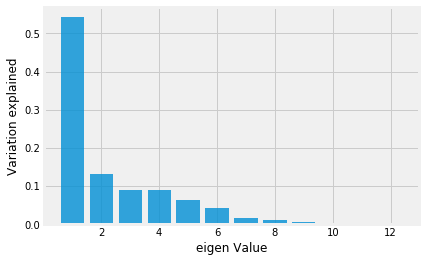

In [41]:
# plotting % Variation explained Vs Eigen Values
plt.bar(list(range(1,13)),pca.explained_variance_ratio_,alpha=0.8, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

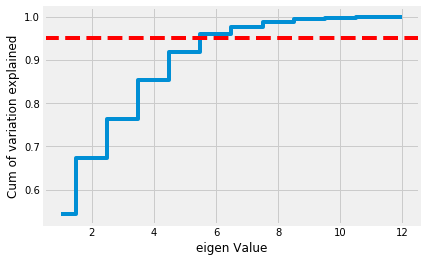

In [42]:
# plotting Cumulative of % Variation explained Vs Eigen Values
plt.step(list(range(1,13)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y = 0.95, color = 'r', linestyle = '--')# To findout the eigen value corresponding to 95% variance
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

1. From the above diagram it is clear that there is a drop in the variance with the increase in no of Proncipal components
2. Principal Components that capture about 95% of the variance in the data is 6

In [43]:
# Reducing the dimensions from 12 to 6
pca = PCA(n_components = 6, random_state = random_state)
pca.fit(X_train)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
display(X_train_reduced.shape, X_test_reduced.shape)



(591, 6)

(254, 6)

In [44]:
pca.components_

array([[ 3.74554039e-02,  2.86271200e-02,  1.45392447e-01,
         8.49147198e-03,  6.05251062e-03,  1.83446989e-01,
        -4.25963851e-02,  1.40795351e-02,  9.69921240e-01,
        -5.75043912e-04,  2.45789066e-03,  1.05267945e-02],
       [ 5.31633788e-02, -1.03188849e-02,  9.44340626e-01,
         2.13169201e-01,  1.47210191e-02,  2.27700736e-02,
        -5.23681771e-02, -2.52049991e-03, -1.51718615e-01,
        -1.81437997e-01, -9.23555946e-03, -1.84202266e-02],
       [ 2.01242884e-02,  1.95756393e-01, -1.67906466e-02,
         2.55767754e-02,  8.32103817e-03,  1.57319853e-01,
        -5.51091438e-02,  1.11272068e-02, -2.63748881e-02,
         8.93399830e-02,  7.09761584e-02, -9.58459107e-01],
       [ 1.31782227e-01,  1.26126172e-01, -6.16981911e-03,
        -1.19476510e-01,  2.20081579e-02,  8.99025102e-01,
        -1.84591371e-01,  7.40742823e-02, -1.88254315e-01,
         1.63688089e-01, -2.18459054e-02,  2.03496296e-01],
       [ 6.34823417e-01, -1.51978056e-02, -8.6501648

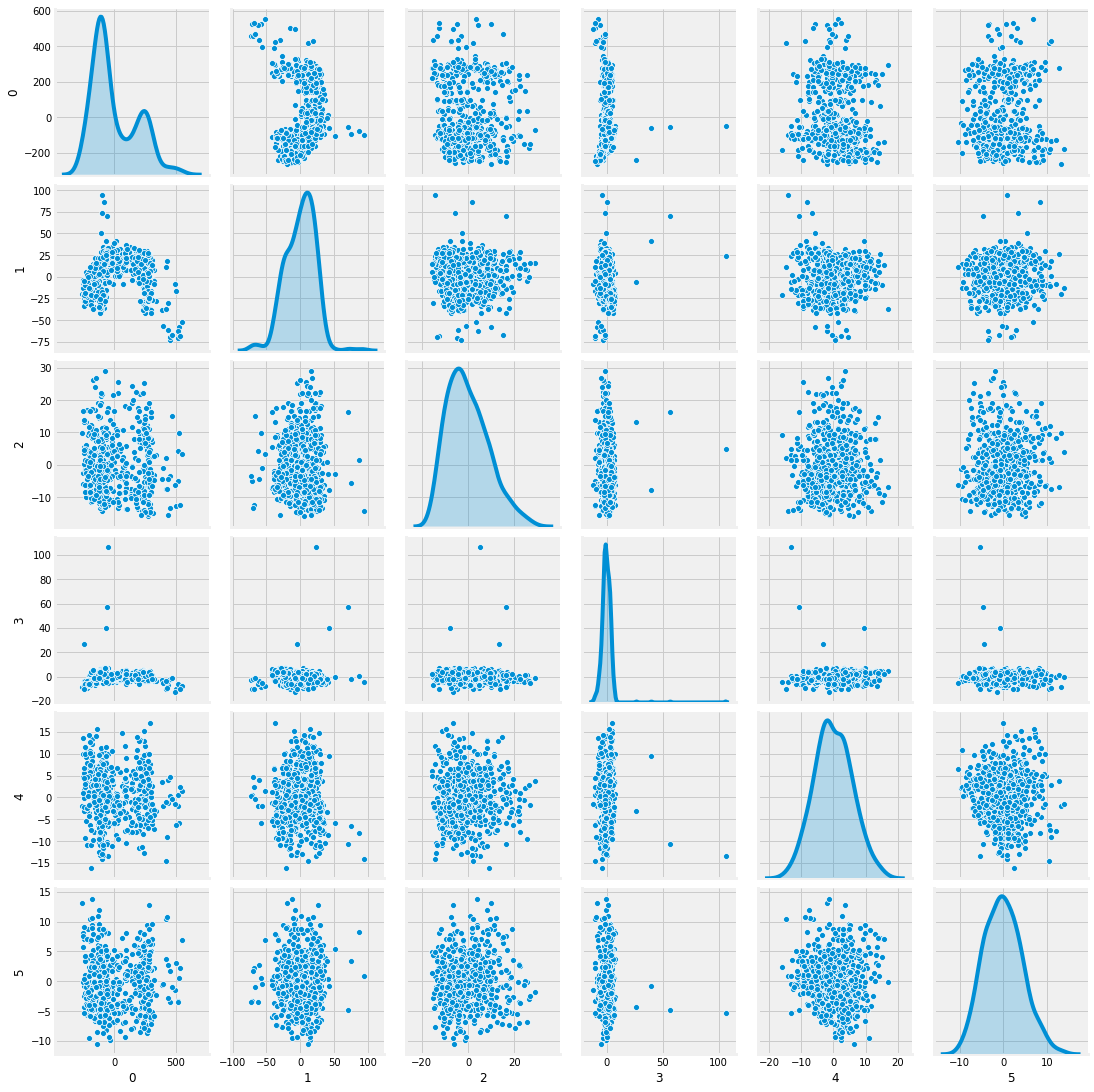

In [62]:
# Pairplot after dimension reduction
sns.pairplot(pd.DataFrame(X_train_reduced), diag_kind = 'kde')

In [45]:
#Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. 
#And the accuracy score should be on the same rows of test data that were used earlier. 
#(hint: set the same random state)

print('****'*10)
print("SVC with imbalanced data:")
print('****'*10)

svc_pc=SVC(gamma="auto",kernel='linear',C=1,random_state=random_state)
svc_pc.fit(X_train_reduced,y_train)
predict_svc_pc=svc_pc.predict(X_test_reduced)

# print classification report 
print(classification_report(y_test, predict_svc_pc))
print("Score-Training Dataset - ",svc_pc.score(X_train_reduced,y_train))
print("Score-Testing Dataset - ",svc_pc.score(X_test_reduced,y_test))
print('\n')
#print Confusion matrix and Accuracy Score
results = confusion_matrix(y_test,predict_svc_pc) 
print ('Confusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test,predict_svc_pc ))
print('\n')

****************************************
SVC with imbalanced data:
****************************************
             precision    recall  f1-score   support

          1       0.64      0.63      0.63        59
          2       0.51      0.50      0.50        62
          3       0.65      0.66      0.66       133

avg / total       0.61      0.61      0.61       254

Score-Training Dataset -  0.7106598984771574
Score-Testing Dataset -  0.6141732283464567


Confusion Matrix :
[[37  4 18]
 [ 2 31 29]
 [19 26 88]]


Accuracy Score : 0.6141732283464567




In [46]:
#Perform K-fold cross validation and get the cross validation score of the model
PCA_kf=StratifiedKFold(n_splits=10, random_state=random_state)
PCA_scores=cross_val_score(svc_pc,X_train_reduced,y_train,cv=PCA_kf)
PCA_cv=PCA_scores.mean()
print("\nCross val score of svc - ", PCA_cv)



Cross val score of svc -  0.6976543931424118


In [47]:
#Compare the accuracy scores and cross validation scores of Support vector machines
#– one trained using raw data and the other using Principal Components, and mention your findings.
print('****'*15)
print("Results after training the model with raw data")
print('****'*15)
results = confusion_matrix(y_test,predict_svc) 
print ('\nConfusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test,predict_svc ))

print("\nCross val score of svc - ", svc_cv)


print('\n')
print('****'*20)
print("Results after training the model using Principal Components")
print('****'*20)
results = confusion_matrix(y_test,predict_svc_pc) 
print ('\nConfusion Matrix :')

print(results) 
print('\n')
print ('Accuracy Score :',accuracy_score(y_test,predict_svc_pc ))

print("\nCross val score of svc - ", PCA_cv)


************************************************************
Results after training the model with raw data
************************************************************

Confusion Matrix :
[[ 57   0   2]
 [  1  59   2]
 [  9   5 119]]


Accuracy Score : 0.9251968503937008

Cross val score of svc -  0.9029691876750701


********************************************************************************
Results after training the model using Principal Components
********************************************************************************

Confusion Matrix :
[[37  4 18]
 [ 2 31 29]
 [19 26 88]]


Accuracy Score : 0.6141732283464567

Cross val score of svc -  0.6976543931424118



1. Corelation between different attributes were checked with the class column to reduce the number of features in the dataset from 18  to 12.

2. PCA is used to reduce the dimensinality further to 6 ensuring that it capture maximum information from the dataset.

3. Support Vector Classifier on the reduced features (dimensions) got an accuracy of 64% and precision (macro) score of 63% . Recall (macro) score for the same was 63%. 

4. SVC on the 12 actual features (with interpretability) and saw an accuracy score of 85%, precision (macro) score of 97% and recall (macro) score of 90%, which is a way better score then SVC when applied on principal components.

5. Shape of dataset we were dealing with was 845 rows and 12 features and 1(Target) class column. Effect of PCA can be more useful in large datasets with more features.

6. For SVC with principal components and original features, both training and validation scores increases with the increase in size of the dataset, which would mean the scores can be further increases with more training samples. Howevver, the gap between training and validation score for SVC with principal component is higher.

In [4]:
svc.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [3]:
svc=SVC()